<a href="https://colab.research.google.com/github/kusalsaraf/Covid-19-Vaccine-Analysis-Of-India-Till-9th-Aug-2021-/blob/main/zerotopandas_course_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Jovian Commit Essentials
# Please retain and execute this cell without modifying the contents for `jovian.commit` to work
!pip install jovian --upgrade -q
import jovian
jovian.set_project('covid19-vaccine-analysis')
jovian.set_colab_id('1c0YfmnYI680-5z_imxgJx6THH14oeVuy')

# COVID-19 Vaccine Analysis Of India
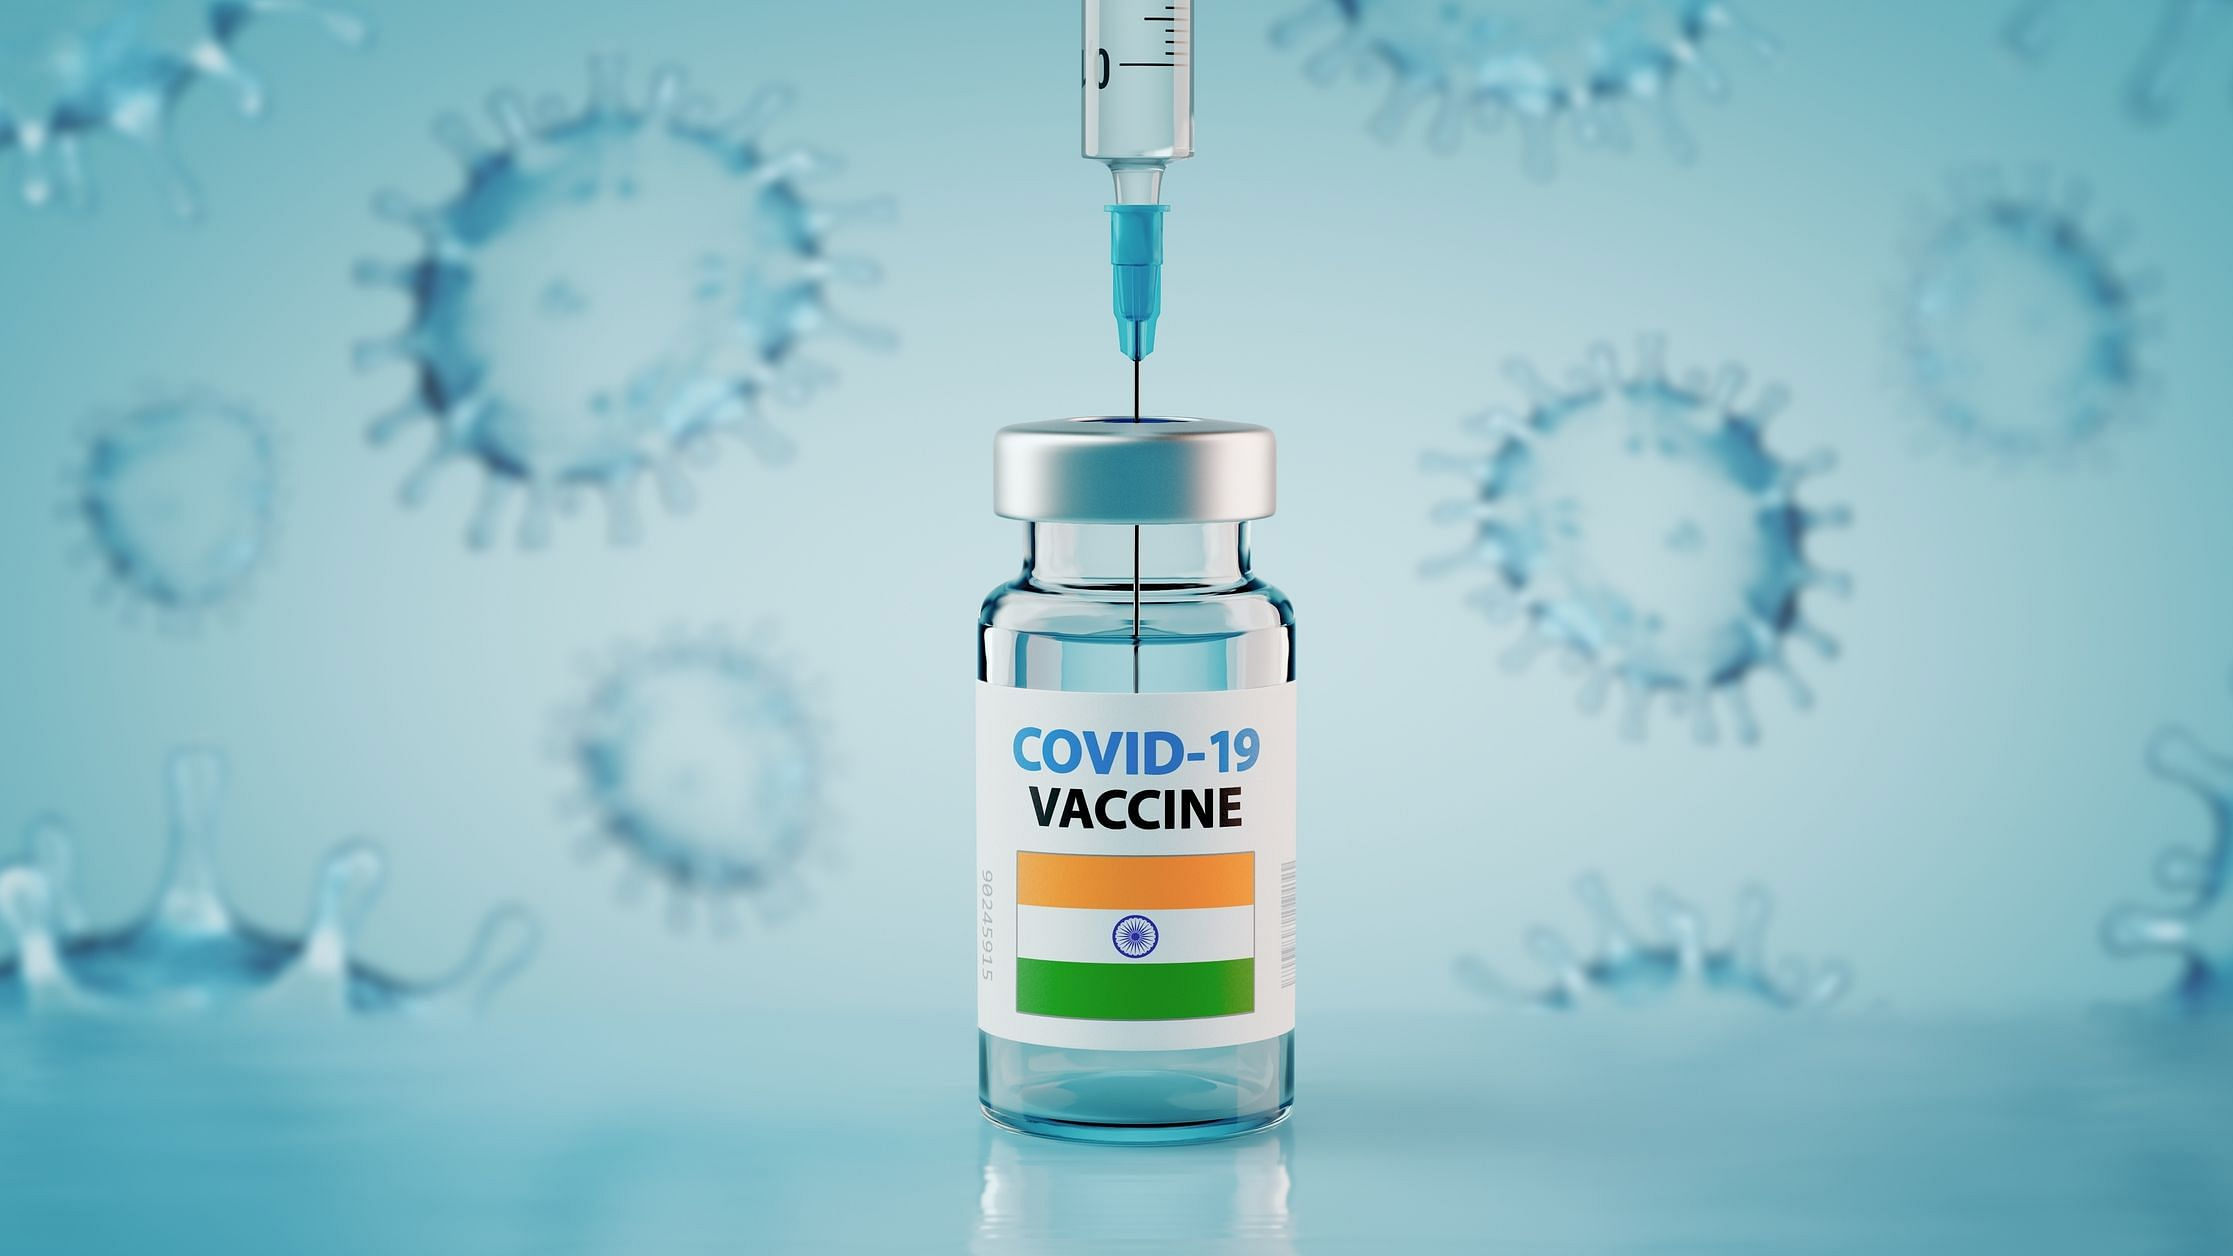



India began administration of COVID-19 vaccines on 16 January 2021. As of 16 November 2021, India has administered over 1.13 billion doses overall, including first and second doses of the currently-approved vaccines. In India, nearly half the eligible population received at least one shot, and 19 per cent received both the doses in the first nine months after vaccine rollout. This project mainly focus on the analysis of different vaccine administered in India till 9 th August 2021. The data being analysis on is collected from dataset kaggle. The three different vaccine include covishield , covaxin and Sputnik V. The project throws light on the number and percentage of people been vaccinated in different age groups both statewise and around the country.

### How to run the code

This is an executable [*Jupyter notebook*](https://jupyter.org) hosted on [Jovian.ml](https://www.jovian.ml), a platform for sharing data science projects. You can run and experiment with the code in a couple of ways: *using free online resources* (recommended) or *on your own computer*.

#### Option 1: Running using free online resources (1-click, recommended)

The easiest way to start executing this notebook is to click the "Run" button at the top of this page, and select "Run on Binder". This will run the notebook on [mybinder.org](https://mybinder.org), a free online service for running Jupyter notebooks. You can also select "Run on Colab" or "Run on Kaggle".


#### Option 2: Running on your computer locally

1. Install Conda by [following these instructions](https://conda.io/projects/conda/en/latest/user-guide/install/index.html). Add Conda binaries to your system `PATH`, so you can use the `conda` command on your terminal.

2. Create a Conda environment and install the required libraries by running these commands on the terminal:

```
conda create -n zerotopandas -y python=3.8 
conda activate zerotopandas
pip install jovian jupyter numpy pandas matplotlib seaborn opendatasets --upgrade
```

3. Press the "Clone" button above to copy the command for downloading the notebook, and run it on the terminal. This will create a new directory and download the notebook. The command will look something like this:

```
jovian clone notebook-owner/notebook-id
```



4. Enter the newly created directory using `cd directory-name` and start the Jupyter notebook.

```
jupyter notebook
```

You can now access Jupyter's web interface by clicking the link that shows up on the terminal or by visiting http://localhost:8888 on your browser. Click on the notebook file (it has a `.ipynb` extension) to open it.


## Downloading the Dataset
I have downlod the covid-19 state wise vaccination data from Kaggle
[Link.](https://www.kaggle.com/sudalairajkumar/covid19-in-india)

In [ ]:
!pip install jovian opendatasets --upgrade --quiet

In [ ]:
# To ignore all the warnings
import warnings
warnings.filterwarnings('ignore')

Downloading the data, and listing the files within the dataset.

In [ ]:
# Dataset URl of kaggle 
dataset_url = 'https://www.kaggle.com/sudalairajkumar/covid19-in-india' 

In [ ]:
# Downloading Dataset from Url
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: kusalsaraf
Your Kaggle Key: ··········


100%|██████████| 758k/758k [00:00<00:00, 78.4MB/s]

The dataset has been downloaded and extracted.

In [ ]:
# Folder than Contain Datasets
data_dir = './covid19-in-india'

In [ ]:
# List of all datasets
import os
os.listdir(data_dir)

['covid_vaccine_statewise.csv',
 'StatewiseTestingDetails.csv',
 'covid_19_india.csv']

Let us save and upload our work to Jovian before continuing.

In [ ]:
project_name = "covid-19-vaccine-analysis-of-india" 

In [ ]:
!pip install jovian --upgrade -q

In [ ]:
import jovian

In [ ]:
jovian.commit(project='COVID19 Vaccine Analysis')

[jovian] Detected Colab notebook...
[jovian] Please enter your API key ( from https://jovian.ai/ ):
API KEY: ··········
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/kusalsaraf5/covid19-vaccine-analysis


'https://jovian.ai/kusalsaraf5/covid19-vaccine-analysis'

## Data Preparation and Cleaning

*   Load the dataset into a data frame using Pandas
*   Explore the number of rows & columns, ranges of values etc.
*   Handle missing, incorrect and invalid data







In [ ]:
# Importing libray to load dataset
import pandas as pd

In [ ]:
# Loading the dataset from actuall path
df = pd.read_csv('./covid19-in-india/covid_vaccine_statewise.csv')

In [ ]:
# First 10 rows of dataset(Sample)
df.head(10)

,Updated On,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),Covaxin (Doses Administered),CoviShield (Doses Administered),Sputnik V (Doses Administered),AEFI,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,579.0,47697.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23757.0,24517.0,2.0,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,635.0,57969.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27348.0,31252.0,4.0,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,NaN,NaN,NaN,1299.0,98150.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41361.0,58083.0,5.0,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,NaN,NaN,NaN,3017.0,192508.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81901.0,113613.0,11.0,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,NaN,NaN,NaN,3946.0,247334.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98111.0,153145.0,24.0,251280.0
5,21/01/2021,India,365965.0,32226.0,12600.0,365965.0,0.0,NaN,NaN,NaN,5367.0,360598.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,132784.0,233143.0,38.0,365965.0
6,22/01/2021,India,549381.0,36988.0,14115.0,549381.0,0.0,NaN,NaN,NaN,8128.0,541253.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,193899.0,355402.0,80.0,549381.0
7,23/01/2021,India,759008.0,43076.0,15605.0,759008.0,0.0,NaN,NaN,NaN,11192.0,747816.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,267856.0,491049.0,103.0,759008.0
8,24/01/2021,India,835058.0,49851.0,18111.0,835058.0,0.0,NaN,NaN,NaN,13156.0,821902.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,296283.0,538647.0,128.0,835058.0
9,25/01/2021,India,1277104.0,55151.0,19682.0,1277104.0,0.0,NaN,NaN,NaN,18858.0,1258246.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,444137.0,832766.0,201.0,1277104.0


In [ ]:
# Seperating India and Other States Data from actual dataset
df_india = df[df['State'] == 'India']
df_state = df[df['State'] != 'India']

In [ ]:
# Additinal info of india dataset
df_india.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 212 entries, 0 to 211
Data columns (total 24 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Updated On                           212 non-null    object 
 1   State                                212 non-null    object 
 2   Total Doses Administered             206 non-null    float64
 3   Sessions                             206 non-null    float64
 4    Sites                               206 non-null    float64
 5   First Dose Administered              206 non-null    float64
 6   Second Dose Administered             206 non-null    float64
 7   Male (Doses Administered)            46 non-null     float64
 8   Female (Doses Administered)          46 non-null     float64
 9   Transgender (Doses Administered)     46 non-null     float64
 10   Covaxin (Doses Administered)        206 non-null    float64
 11  CoviShield (Doses Administered) 

In [ ]:
# As state contain few unique value changing it to category for memory optimization
df_india['State'] = df_india.State.astype('category')

In [ ]:
# Copying the data at proper position
for idx in df_india.index:
  if pd.isna(df_india['Male (Doses Administered)'][idx]):
    df_india['Male (Doses Administered)'][idx] = df_india['Male(Individuals Vaccinated)'][idx]
  if pd.isna(df_india['Female (Doses Administered)'][idx]):
    df_india['Female (Doses Administered)'][idx] = df_india['Female(Individuals Vaccinated)'][idx]
  if pd.isna(df_india['Transgender (Doses Administered)'][idx]):
    df_india['Transgender (Doses Administered)'][idx] = df_india['Transgender(Individuals Vaccinated)'][idx]
  if pd.isna(df_india['18-44 Years (Doses Administered)'][idx]):
    df_india['18-44 Years (Doses Administered)'][idx] = df_india['18-44 Years(Individuals Vaccinated)'][idx]
  if pd.isna(df_india['45-60 Years (Doses Administered)'][idx]):
    df_india['45-60 Years (Doses Administered)'][idx] = df_india['45-60 Years(Individuals Vaccinated)'][idx]
  if pd.isna(df_india['60+ Years (Doses Administered)'][idx]):
    df_india['60+ Years (Doses Administered)'][idx] = df_india['60+ Years(Individuals Vaccinated)'][idx]

In [ ]:
# Droping Unnecessary columns from India Detaset
df_india.drop(df_india.columns[[3,4,13, 17, 18, 19,20,21,22,23]], axis = 1, inplace = True)

In [ ]:
#checking Null in india dataset
df_india.isnull().sum()

Updated On                            0
State                                 0
Total Doses Administered              6
First Dose Administered               6
Second Dose Administered              6
Male (Doses Administered)             6
Female (Doses Administered)           6
Transgender (Doses Administered)      6
 Covaxin (Doses Administered)         6
CoviShield (Doses Administered)       6
Sputnik V (Doses Administered)      131
18-44 Years (Doses Administered)     65
45-60 Years (Doses Administered)     65
60+ Years (Doses Administered)       65
dtype: int64

In [ ]:
#Droping the NaN value that cannot be filled
df_india = df_india.dropna(subset=['Total Doses Administered'])

In [ ]:
# Filling the NaN values 0 because in earlier date Sputnik V vaccine have not started in India
df_india['Sputnik V (Doses Administered)'] = df_india['Sputnik V (Doses Administered)'] .fillna(0)

In [ ]:
# Selecting Updated On(Date) column as Index
df_india.set_index('Updated On', inplace=True)

In [ ]:
# Additinal info of State dataset
df_state.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7633 entries, 212 to 7844
Data columns (total 24 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Updated On                           7633 non-null   object 
 1   State                                7633 non-null   object 
 2   Total Doses Administered             7415 non-null   float64
 3   Sessions                             7415 non-null   float64
 4    Sites                               7415 non-null   float64
 5   First Dose Administered              7415 non-null   float64
 6   Second Dose Administered             7415 non-null   float64
 7   Male (Doses Administered)            7415 non-null   float64
 8   Female (Doses Administered)          7415 non-null   float64
 9   Transgender (Doses Administered)     7415 non-null   float64
 10   Covaxin (Doses Administered)        7415 non-null   float64
 11  CoviShield (Doses Administer

In [ ]:
# As state contain few unique value changing it to category (memory optimization)
df_state['State'] = df_state.State.astype('category')

In [ ]:
# Copying the data at proper position
for idx in df_state.index:
  if pd.isna(df_state['Male (Doses Administered)'][idx]):
    df_state['Male (Doses Administered)'][idx] = df_state['Male(Individuals Vaccinated)'][idx]
  if pd.isna(df_state['Female (Doses Administered)'][idx]):
    df_state['Female (Doses Administered)'][idx] = df_state['Female(Individuals Vaccinated)'][idx]
  if pd.isna(df_state['Transgender (Doses Administered)'][idx]):
    df_state['Transgender (Doses Administered)'][idx] = df_state['Transgender(Individuals Vaccinated)'][idx]
  if pd.isna(df_state['18-44 Years (Doses Administered)'][idx]):
    df_state['18-44 Years (Doses Administered)'][idx] = df_state['18-44 Years(Individuals Vaccinated)'][idx]
  if pd.isna(df_state['45-60 Years (Doses Administered)'][idx]):
    df_state['45-60 Years (Doses Administered)'][idx] = df_state['45-60 Years(Individuals Vaccinated)'][idx]
  if pd.isna(df_state['60+ Years (Doses Administered)'][idx]):
    df_state['60+ Years (Doses Administered)'][idx] = df_state['60+ Years(Individuals Vaccinated)'][idx]

In [ ]:
# Droping Unnecessary columns from state dataset
df_state.drop(df_state.columns[[3,4,13, 17, 18, 19,20,21,22,23]], axis = 1, inplace = True)

In [ ]:
#check Null in State Dataset
df_state.isnull().sum()

Updated On                             0
State                                  0
Total Doses Administered             218
First Dose Administered              218
Second Dose Administered             218
Male (Doses Administered)            218
Female (Doses Administered)          218
Transgender (Doses Administered)     218
 Covaxin (Doses Administered)        218
CoviShield (Doses Administered)      218
Sputnik V (Doses Administered)      4719
18-44 Years (Doses Administered)    2345
45-60 Years (Doses Administered)    2344
60+ Years (Doses Administered)      2344
dtype: int64

In [ ]:
#Droping the NaN value that cannot be filled
df_state = df_state.dropna(subset=['Total Doses Administered'])

In [ ]:
# Filling the NaN values 0 because in earlier date Sputnik V vaccine have not started in India
df_state['Sputnik V (Doses Administered)'] = df_state['Sputnik V (Doses Administered)'] .fillna(0)

In [ ]:
# Selecting Updated On(Date) column as Index
df_state.set_index('Updated On', inplace=True)

In [ ]:
import jovian

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/kusalsaraf5/covid19-vaccine-analysis


'https://jovian.ai/kusalsaraf5/covid19-vaccine-analysis'

## Exploratory Analysis and Visualization
To find insight from our dataset, we'll explore its variables. This exploratory analysis will help us to understand how the variables interact and how representative they are.



Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [ ]:
# Import libraries for Visualization
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [ ]:
# uninstalling the default version of plotly.express because Default Google Colab installed version is 4.4.3
!pip uninstall plotly

In [ ]:
# installing the new version of plotly.express for some extra feature
!pip install plotly

In [ ]:
# Checking that the plotly.express version is installed
import plotly
plotly.__version__

'5.4.0'

Line Chart That Depicts Total Number of Vaccine Dose Administered Single and Double Both Of Covid-19 Vaccine Till 9th Aug 2021 State Wise.




In [ ]:
df_state.index = pd.to_datetime(df_state.index, format="%d/%m/%Y",)
fig = px.line(df_state, x=df_state.index, y='Total Doses Administered', color='State',
              title='Total number of Dose Administered Of Covid-19 vaccine till 9th Aug 2021',
              template="plotly_dark",
              labels={'Updated On': "Date"})
fig.show()

We can clearly see from the graph that there is increase in no. of vaccination from February to August State wise with the highest number Of vaccination is Uttar Pradesh.

Bar Charts With Long Format Data That Depicts Total Number Of Vaccine Dose Administered (Covaxine ,CoviShiels and Sputnik_V) , Covid-19 Vaccine Till 9th Aug 2021 State Wise.

In [ ]:
fig = px.bar(df_state,x="State", y=[" Covaxin (Doses Administered)", "CoviShield (Doses Administered)",'Sputnik V (Doses Administered)'],
      title = 'Covaxine Vs CoviShiels Vs Sputnik_V Doses Administered till 9th Aug 2021',template="plotly_dark",
      color_discrete_map={
        ' Covaxin (Doses Administered)': 'yellow',
        'CoviShield (Doses Administered)': 'red',
        'Sputnik V (Doses Administered)' : 'green'
    })

fig.show()

From the graph we can conclude that covishield vaccine has been administered the most and Sputnik v the least state wise data till 9th Aug 2021.

Bar Chart That Depicts Total Number Of Vaccine Dose Administered Gender Wise Male , Female and Transgender of Covid-19 Vaccine Till 9th Aug 2021 State Wise.

In [ ]:
df1 = df_state.groupby(['State'])['Male (Doses Administered)','Female (Doses Administered)','Transgender (Doses Administered)'].agg('sum')

In [ ]:
fig = px.bar(df1, x=df1.index, y=['Male (Doses Administered)','Female (Doses Administered)','Transgender (Doses Administered)'],
             template="plotly_dark",title = 'Male Vs Female Vs Transgender Doses Administered till 9th Aug 2021')
fig.show()

This graph shows the analysis of no of vaccine that has been given to male female and transgender state wise. 
Uttarpradesh being the state with highest number of vaccination it may be due to largest population.

Pie Chart That Depicts Percent Of Vaccine type(Covaxine ,CoviShiels and Sputnik_V) Administered Of Covid-19 Vaccine Till 9th Aug 2021 In India.

In [ ]:
fig = px.pie(df, values=[df_india[' Covaxin (Doses Administered)']['09/08/2021'],
                         df_india['CoviShield (Doses Administered)']['09/08/2021'],
                         df_india['Sputnik V (Doses Administered)']['09/08/2021']], 
             title='Vaccination Wise Dose in India till 9th Aug 2021',
             names=[' Covaxin (Doses Administered)','CoviShield (Doses Administered)','Sputnik V (Doses Administered)'],template="plotly_dark")
fig.show()

This graph is India's Vaccination Percentage data. 
This graph shows that 87.7 percent people got covishield , Covaxin with 12.2 percent and the least Sputnik V with 0.115 percent.

TreeMap That Depicts Percentage Of Vaccine Dose Administered Gender Wise Male , Female and Transgender of Covid-19 Vaccine Till 9th Aug 2021 In India.

In [ ]:
!pip install squarify

In [ ]:
import squarify

Age Group Wise Vaccine Percentage In India till 9th Aug 2021


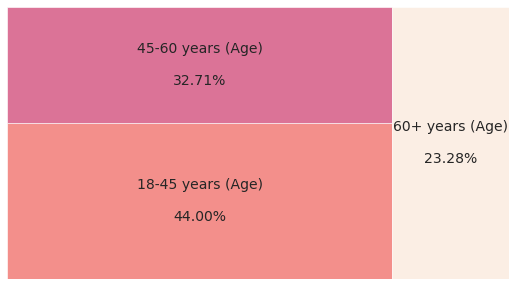

In [ ]:
data = [df_india['18-44 Years (Doses Administered)']['09/08/2021'],df_india['45-60 Years (Doses Administered)']['09/08/2021'],df_india['60+ Years (Doses Administered)']['09/08/2021']]
d_per = []
for x in data:
  d_per.append((x/sum(data))*100)
label=["18-45 years (Age)\n\n"+str(d_per[0])[:5]+'%', "45-60 years (Age)\n\n"+str(d_per[1])[:5]+'%', "60+ years (Age)\n\n"+str(d_per[2])[:5]+'%']
squarify.plot(sizes=d_per, label=label,alpha =0.6)
plt.axis('off')
print('Age Group Wise Vaccine Percentage In India till 9th Aug 2021')
plt.show()

The treeplot shows India having maximum number of 18 - 45 population has been administered with maximum number of vaccination ie. 44.00 percentage 
45-65 age group people has been administered with 32.71 percent vaccination 
60+ age group people has been administered with 23.28 percentage vaccination.

Let us save and upload our work to Jovian before continuing

In [ ]:
import jovian

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/kusalsaraf5/covid19-vaccine-analysis


'https://jovian.ai/kusalsaraf5/covid19-vaccine-analysis'

### Asking and Answering Questions
Some More Deep Analysis Of COVID-19 Vaccine By Visualization , Fitering and Adding More Data.





#### Top 5 highest vaccination States 

In [ ]:
last_date = pd.Timestamp(2021, 8, 9, 0)
tmp = df_state.loc[last_date,['State','Total Doses Administered']]
sorted = tmp.sort_values(by='Total Doses Administered',ascending=False)[:5]

In [ ]:
fig = px.bar(sorted, x="Total Doses Administered", y="State", orientation='h',template="plotly_dark",title= "Top 5 highest vaccination States Till 9th Aug 2021")
fig.show()

This graph shows the top 5 state with fastest vaccination (It may be fast due to polulation).

These states are Rajasthan < Madhya Pradesh < Gujrat < Maharashtra < Uttar Pradesh.

#### Percentage Of Vaccination Completed State Wise 

In [ ]:
tmp.reset_index(inplace = True,drop=True)

In [ ]:
# Population count State wise
# ref url - https://www.findeasy.in/top-indian-states-by-population/
d={'Uttar Pradesh': 230000000,'Maharashtra':124400000,'Bihar':123000000,'West Bengal':98000000,'Madhya Pradesh':84500000,
   'Tamil Nadu':76500000,'Rajasthan':79200000,'Karnataka':67000000,'Gujarat':70000000,'Andhra Pradesh':52700000,
   'Odisha':45500000,'Telangana':38000000,'Kerala':35500000,'Jharkhand':38500000,'Assam':35000000,'Punjab':30000000,
   'Chhattisgarh':29500000,'Haryana':29500000,'Delhi':20000000,'Jammu and Kashmir':13400000,'Uttarakhand':11400000,
   'Himachal Pradesh':7400000,'Tripura':4100000,'Meghalaya':3300000,'Manipur':3165000,'Nagaland':2200000,
   'Goa':1600000,'Arunachal Pradesh':1533000,'Puducherry': 1571000,'Mizoram':1216000,'Chandigarh':1200000,
   'Sikkim':677000,'Dadra and Nagar Haveli and Daman and Diu':1077000,'Andaman and Nicobar Islands':400000,
   'Ladakh':297000,'Lakshadweep':69000
   }

In [ ]:
p_data=[]
for id in tmp.index:
  t = str(tmp['State'][id])
  p_data.append(d[t])
tmp['Population'] = p_data

In [ ]:
tmp['percent_completed'] = (tmp['Total Doses Administered'] / tmp['Population'])*100


In [ ]:
text = list(tmp['percent_completed'])
fig = px.bar(tmp, x='State', y='percent_completed',title="Percentage Of Vaccination Completed Till 9th Aug 2021",template="plotly_dark",text=text)
fig.update_traces(texttemplate='%{text:.3s}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.show()

This graph shows percentage of completed vaccination State wise.
Highest among all the states is Lakshadweep(It may be due to low population) least being bihar.

####Percentage Of Vaccination Completed State Wise till 09th Aug 2021

In [ ]:
state_wise_signledose = df_state.loc[last_date,['State','First Dose Administered','Second Dose Administered','Total Doses Administered']]


In [ ]:
state_wise_signledose['Population'] = list(tmp['Population'])

In [ ]:
state_wise_signledose['Single Dose Percentage'] = (state_wise_signledose['First Dose Administered']/state_wise_signledose['Population'])*100
state_wise_signledose['Second Dose Percentage'] = (state_wise_signledose['Second Dose Administered']/state_wise_signledose['Population'])*100
state_wise_signledose['Unvaccinated Percentage'] = ((state_wise_signledose['Population'] -(state_wise_signledose['Total Doses Administered'] 
                                                                                                      ))/state_wise_signledose['Population'])*100

In [ ]:
fig = px.line(state_wise_signledose, x='State', y=['Single Dose Percentage','Second Dose Percentage','Unvaccinated Percentage'],
              title='Percentage Of Single-Dose Vs Second-Dose Vs Unvaccinated State Wise till 09th Aug 2021',
              template="plotly_dark")
fig.show()

This graph shows state wise how much percent of single dose , double dose and non vaccinated.

#### Percentage Of Vaccination Completed In India Till 09th Aug 2021

In [ ]:
df_india.index = pd.to_datetime(df_india.index, format="%d/%m/%Y",)
india_vaccination = df_india.loc[last_date,['State','First Dose Administered','Second Dose Administered','Total Doses Administered']]

In [ ]:
#ref https://worldpopulationreview.com/countries/india-population
india_population = 1393409038

In [ ]:
india_vaccination['Single Dose Percentage'] = (india_vaccination['First Dose Administered']/india_population)*100
india_vaccination['Second Dose Percentage'] = (india_vaccination['Second Dose Administered']/india_population)*100
india_vaccination['Unvaccinated Percentage'] = ((india_population -(india_vaccination['Total Doses Administered'] 
                                                                                                      ))/india_population)*100

In [ ]:
fig = px.pie(df, values=[india_vaccination['Single Dose Percentage'],
                         india_vaccination['Second Dose Percentage'],
                         india_vaccination['Unvaccinated Percentage']], 
             title='Percentage Of Double-Dose Completed In India Till 09th Aug 2021',
             names=['Single Dose Percentage','Second Dose Percentage','Unvaccinated Percentage'],template="plotly_dark")
fig.show()

This graph shows single dose , double dose and non vaccinated population percentage in India.

Let us save and upload our work to Jovian before continuing.

In [ ]:
import jovian

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/kusalsaraf5/covid19-vaccine-analysis


'https://jovian.ai/kusalsaraf5/covid19-vaccine-analysis'

## Inferences and Conclusion

### All The Analysis And Conclusion Are Till 9th Aug 2021

* According to the statistics , maximum number of vaccine that has been administered is covishield , second being covaxin and least is Sputnik V both accross the country and state wise.

* The states with highest number of successful vaccination are Uttar Pradesh, Maharastra, Madhyapradesh, Gujarat, Rajasthan.

* Percentage of single dose 28.7 , Percentage of double dose vaccination is 8.12 and Percentage of non vaccinated is 63.2.

* Age group of 18-45 has been administered with highest number of vaccine which is 44% , Age group 45-60 comes second with  32.71% of vaccination and lastly 60+ age group with 23.28%.





In [ ]:
import jovian

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/kusalsaraf5/covid19-vaccine-analysis


'https://jovian.ai/kusalsaraf5/covid19-vaccine-analysis'

## References and Future Work

*   [Pandas user guide](https://pandas.pydata.org/docs/user_guide/index.html)
*   [Kaggle dataset](https://www.kaggle.com/datasets)
*   [Plotly user guide & tutorial](https://plotly.com/python-api-reference/)
*   [GeeksforGeeks](https://www.geeksforgeeks.org/)


In [ ]:
import jovian

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/kusalsaraf5/covid19-vaccine-analysis


'https://jovian.ai/kusalsaraf5/covid19-vaccine-analysis'